# **Tarea 1: Exploración de la distribución taxonómica de las proteínas que participan en neuroreceptores de acetilcolina**

#### Realizado por Blanca Candelas Galavís en el curso 2020/21

## Preparación del ambiente de computación

Para la realización de esta tarea se empleará el lenguaje de programación R y se instalará la herramienta BLAST que se empleará para realizar los análisis.

Para preparar el ambiente de computación se usará el archivo: `reparar_ambiente.sh` que es un script de BASH que instalará BLAST y descomprimirá el archivo `taxdb.tbd.gz`, lo que permitirá su uso a lo largo de la tarea.

Para ello se ejecuta el siguiente bloque:

In [1]:
system2(command = './preparar_ambiente.sh', wait = TRUE)

## Introducción

En un artículo publicado recientemente por Viscardi *et al.* (2021) se exponen los análisis realizados sobre los orígenes de la red de genes implicados en los diferentes sistemas de neurotransmisión: GABAérgico, glutamatérgico, serotonérgico, dopaminérgico y colinérgico. En él se analizan 321 genes humanos, 83 de los cuales actúan exclusivamente en el sistema nervioso. Curiosamente, en este estudio se muestra que la gran mayoría de estos genes y sus respectivas proteínas aparecieron mucho antes que el propio sistema nervioso de los vertebrados, remontándose su origen hasta el último ancestro común entre cordados y cnidarios. Es por ello que no seconocen proteínas homólogas en ctenóforos, poríferos, placozoa, hongos ni plantas.

Este descubrimiento resulta interesante y es por ello que el objetivo de esta tarea es realizar una exploración de la distribución taxonómica de las proteínas que participan en neuroreceptores, en concreto los de acetilcolina, también llamados receptores colinérgicos. Estos receptores colinérgicos se dividen, a su vez, en dos tipos: los muscarínicos y los nicotínicos. Existen algunas diferencias entres estos dos tipos de receptores colinérgicos, una de ellas es que mientras que los receptores de tipo nicotínico ejercen su función sobre el sistema nervioso central y las uniones neuromusculares, los receptores de tipo muscarínico ejercen su función de forma más general, actuando sobre el sistema nervioso central y el sistema nervioso periférico que controla los organos viscerales (Carlson *et al.*, 2019). 

Para llevar a cabo el análisis de la distribución taxonómica se parte de 3 secuencias de proteínas en formato fasta: `CHRM1`, `CHRNA3` y `CHRNA7`. Estas tres secuencias corresponden a proteínas humanas de receptores colinérgicos: la primera es un receptor colinérgico de tipo muscarínico, mientras que las dos siguientes corresponden a dos subunidades parálogas de un receptor colinérgico de tipo nicotínico. Con ellas se explorará una base de datos para observar sus posibles homologías con proteínas de otros grupos eucariotas más alejados evolutivamente.


## Métodos

Para la búsqueda de homología con otras proteínas se requiere el uso de una base de datos de proteínas, es por ello que para esta búsqueda se usará la base de datos **Swissprot** que ya está instalada localmente en este ambiente de computación.

Para observar la distribución taxonómica de las secuencias de proteínas se utilizará **blastp** (Altschul *et al.*, 1990) con diferentes umbrales de valor E que irán de valores más exigentes con el grado de similitud en las búsquedas, es decir, valores E máximos menores, hasta valores menos exigentes con el grado de similitiud, es decir, valores E máximos mayores, de forma que se podrá determinar el ritmo al que aumenta la distribución taxonómica de las secuencias de interés. Posteriormente se hará un pequeño inciso sobre la utilidad de **psiblast** en este tipo de estudios.

En primer lugar se realizará un análisis en profundidad sobre la secuencia de la proteína de interés `CHRM1`, ya que corresponde a un receptor colinérgico de tipo muscarínico que actua tanto a nivel del sistema nervioso central como del periférico. Las otras dos secuencias proteicas (`CHRNA3` y `CHRNA7`) se utilizarán en último lugar para la comparación de los resultados de la distribución taxonómica entre los receptores colinérgicos de tipo muscarínico y nicotínico.


## Resultados

### Análisis del receptor colinérgico muscarínico CHRM1

#### BLASTP individual

En primer lugar, se ejecuta una búsqueda con **blastp** en la base de datos **Swissprot** con un umbral de valor E muy exigente, de 1.0e-50, de esta forma se descartarán la mayoría de secuencias con homología y solo se mostrarán en los resultados aquellas que muestren un grado de homología muy alto respecto a la proteína de interés, en este caso `CHRM1`. De esta forma definiremos como *query* `CHRM1.fas`, como *database* **swissprot**, como *evalue* **1.0e-50** y el *outformat* será el **7** que indica que el formato de salida de la información sea una tabla con líneas texto:

In [2]:
BlastCHRM1 <- system2(command = 'blastp',
                     args = c('-db', 'swissprot',
                             '-query', 'CHRM1.fas',
                             '-evalue', '1.0e-50',
                             '-outfmt', '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                     stdout = TRUE)

Una vez realizada la búsqueda de la secuencia de interés en la base de datos y guardada como `BlastCHRM1`, se realiza una tabla con los resultados obtenidos para poder visualizarlos con comodidad. Para ello se ejecuta el siguiente script en el que se emplea la función `read.table()`:

In [3]:
TablaCHRM1 <- read.table(textConnection(BlastCHRM1),
                        sep = '\t',
                        col.names = c('Nacceso', 'Pident', 'Longitud', 'InicioQ', 'FinQ', 'InicioS', 'FinS', 'ValorE', 'IdTaxS', 'NCientS', 'NRangS'))

TablaCHRM1

Nacceso,Pident,Longitud,InicioQ,FinQ,InicioS,FinS,ValorE,IdTaxS,NCientS,NRangS
<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
P11229.2,100.000,460,1,460,1,460,0.00e+00,9606,Homo sapiens,primates
P56489.1,99.565,460,1,460,1,460,0.00e+00,9544,Macaca mulatta,primates
Q5R949.1,99.565,460,1,460,1,460,0.00e+00,9601,Pongo abelii,primates
P04761.1,99.130,460,1,460,1,460,0.00e+00,9823,Sus scrofa,even-toed ungulates
P12657.2,98.913,460,1,460,1,460,0.00e+00,10090,Mus musculus,rodents
P08482.1,98.696,460,1,460,1,460,0.00e+00,10116,Rattus norvegicus,rodents
Q9N2A4.1,51.731,520,10,438,51,564,1.14e-170,9598,Pan troglodytes,primates
P20309.1,51.731,520,10,438,51,564,2.19e-170,9606,Homo sapiens,primates
Q9N2A3.1,51.737,518,10,436,51,562,1.08e-169,9595,Gorilla gorilla gorilla,primates


Con la función `dim()` podemos obtener la información sobre las dimensiones de la tabla:

In [4]:
dim(TablaCHRM1)

[1] 37 11

La tabla de resultados muestra las 37 secuencias encontradas para un valor E de 1.0e-50 (muy restrictivo), esta información está ordenada en 11 columnas a las que se les ha dado nombre para una mayor comodidad en su interpretación y que se muestran en orden de menor a mayor valor E de cada alineamiento, es decir, de mayor a menor precisión/fiabilidad en el resultado del alineamiento. El significado de las abreviaciones son:

* **Nacceso:** número de acceso o identificador de la secuencia encontrada como resultado de la búsqueda (*subject*).
* **Pident:** porcentaje de identidad entre la secuencia de interés (*query*) y el *subject* en su alineamiento.
* **Longitud:** longitud del alineamiento entre la *query* y la *subject*.
* **InicioQ:** primera posición alineada en la *query*.
* **FinQ:** última posición de la *subject* alineada.
* **InicioS:** primera posición de la *subject* alineada.
* **FinS:** última posición de la *subject* alineada.
* **ValorE:** valor E del alineamiento. Es decir, número de alineamientos de igual o mejor puntuación esperados por azar en una base de datos igual de grande.
* **IdTaxS:** identificador de la especie a la que pertenece la *subject* en la base de datos de taxonomía del NCBI.
* **NCientS:** nombre científico de la especie a la que pertenece la *subject*.
* **NRangS:** nombre de un grupo taxonómico de rango superior al que pertenece la *subject*.

Se puede observar que los 6 primeros resultados de la busqueda presentan un valor de E ínfimo, lo que significa que se podría afirmar con certeza que esas especies poseen proteínas con la misma secuencia que nuestra *query* es decir, que poseen proteínas con la secuencia de `CHRM1`. Teniendo en cuenta el valor E máximo tan exigente proporcionado para esta búsqueda, se esperaba obetener resulatdos de grupos taxonómicos muy cercanos a los humanos o de grupos taxonómicos cercanos como otros vertebrados, ya que nuestra *query* es una secuencia de una proteían humana. Esta predicción se ha cumplido, pues se obervan resultados que comprenden sobre todo otros vertebrados, aunque también se observan unos pocos invertebrados con valores E para su alineamiento algo mayores.


#### BLASTP en serie

Para obervar cómo aumenta el número de secuencias encontradas y, con ello, la diversidad taxonómica se procede a aumentar el umbral del valor E de forma secuencial. Este proceso puede hacerse individualmente como en el apartado anterior o en serie. Como se deben hacer muchos análisis con diferentes umbrales del valor E, se realizará en serie. Para ello se emplea la función `lapply()` que permite ejecutar una búsqueda **blastp** para cada valor E que se le indique en un vector que se definirá previamente como `Valores_E`. Dentro de esta misma función también se indicará que tras realizar la búsqueda se realizen las correspondientes tablas con la función `read.table()` vista anteriormente. Los scripts son los siguientes:

In [5]:
Valores_E <- c('1.0e-50', '1.0e-40', '1.0e-30', '1.0e-20', '1.0e-10', '1.0e-08', '1.0e-06', '1.0e-04', '1.0e-02', '1')

Lista_TablasCHRM1 <- lapply(Valores_E, function(x){ListaBlastCHRM1 <- system2(
                                                    command = 'blastp',
                                                    args = c('-db', 'swissprot',
                                                            '-query', 'CHRM1.fas',
                                                            '-evalue', x,
                                                            '-outfmt', '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                                                     stdout = TRUE)
                                                  read.table(textConnection(ListaBlastCHRM1),
                                                            sep = '\t',
                                                            col.names = c('Nacceso', 'Pident', 'Longitud', 'InicioQ', 'FinQ', 'InicioS', 'FinS', 'ValorE',
                                                                          'IdTaxS', 'NCientS', 'NRangS'))
                                                  })

Una vez ejecutado estos script se obtiene el objeto `Lista_TablasCHRM1` en el que se encuentran los resultados de los diez blastp ejecutados (con valores E de: 1.0e-50, 1.0e-40, 1.0e-30, 1.0e-20, 1.0e-10, 1.0e-08, 1.0e-06, 1.0e-04, 1.0e-02 y 1) en forma de tabla con las mismas abreviaciones utilizadas para realizar la tabla del apartado anterior.

Si bien estos resultados se analizarán en conjunto posteriormente, resulta interesante observar en primer lugar los primeros y últimos resultados de la tabla 2, ya que la tabla 1 es la que analizamos de forma individual en el apartado anterior con un valor E de 1.0e-50 (más exigente), y la tabla 2 tiene un valor de E de 1.0e-40 (algo menos exigente). En principio se esperaría que los resultados iniciales de ambas tablas fuesen los mismos, ya que una menor exigencia implicará encontrar resultados más divergentes, es decir, con valores E para su alineamiento mayores y estos se muestran al final de la tabla, de forma que los primeros resultados quedarían intactos.
Para visualizar los primeros resultados de la tabla 2 y comprobar que son los mismos que se obtuvieron para un valor E menor (1.0e-50) se usa la función `head()`:

In [6]:
head(Lista_TablasCHRM1[[2]])

,Nacceso,Pident,Longitud,InicioQ,FinQ,InicioS,FinS,ValorE,IdTaxS,NCientS,NRangS
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
1,P11229.2,100.000,460,1,460,1,460,0,9606,Homo sapiens,primates
2,P56489.1,99.565,460,1,460,1,460,0,9544,Macaca mulatta,primates
3,Q5R949.1,99.565,460,1,460,1,460,0,9601,Pongo abelii,primates
4,P04761.1,99.130,460,1,460,1,460,0,9823,Sus scrofa,even-toed ungulates
5,P12657.2,98.913,460,1,460,1,460,0,10090,Mus musculus,rodents
6,P08482.1,98.696,460,1,460,1,460,0,10116,Rattus norvegicus,rodents


Como esperabamos los primeros 6 resultados son los mismos que obtuvimos con una exigencia mayor en la tabla 1.

Sin embargo, al haber relajado la exigencia de la búsqueda con un valor E máximo mayor, esperaría un cambio los resultados finales de la tabla 2 respecto a la primera. Podemos comprobarlo usando el siguiente script en el que se usa la función `tail()`:

In [7]:
tail(Lista_TablasCHRM1[[2]])

,Nacceso,Pident,Longitud,InicioQ,FinQ,InicioS,FinS,ValorE,IdTaxS,NCientS,NRangS
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
48,Q60474.2,27.714,433,32,441,54,462,1.27e-42,10141,Cavia porcellus,rodents
49,P18871.2,28.037,428,32,441,55,463,2.04e-42,9823,Sus scrofa,even-toed ungulates
50,P18089.4,26.862,443,34,442,21,450,1.58e-41,9606,Homo sapiens,primates
51,Q25190.1,29.263,434,25,444,62,465,1.97e-41,7102,Heliothis virescens,moths
52,Q8JG70.1,25.980,408,39,441,44,407,4.17e-41,7955,Danio rerio,bony fishes
53,P19328.2,27.517,447,34,442,26,453,6.37e-41,10116,Rattus norvegicus,rodents


Como se esperaba, los resultados finales para un umbral de valor E máximo mayor (menos exigente) son más abundantes (53 en esta tabla vs 37 en la tabla anterior), diferentes y muestran un valor E para su alineamiento mayor, es decir, son resultados menos precisos. Aun así, se observa que las secuencias encontradas siguen siendo mayormente de vertebrados (solo se muestra un invertebrado).

Una vez realizada esta observación se procede a analizar los datos obtenidos en conjunto con diferentes valores E. Para ello conviene saber el número de secuencias homólogas que se han encontrado con el análisis **blastp** en la base de datos **Swissprot**. Para ello se aplica la funcion `sapply()` junto con la función `dim()` en las que se pide que devuelvan las dimensiones (número de filas y de columnas) del objeto `Lista_TablasCHRM1`, en concreto el número de filas (dimensión **1**). Inmediatamente después se invoca el objeto para que se muestre en el notebook el número de filas de cada tabla:

In [8]:
Numero_Filas_CHRM1 <- sapply(Lista_TablasCHRM1, function(x) dim(x)[1])
                             
Numero_Filas_CHRM1

[1]  37  53  94 249 485 577 647 682 730 774

Así se observa de nuevo que el número de resultados es cada vez mayor conforme se va aumentando el valor E máximo en las búsquedas, es decir, conforme se va relajando la exigencia de la búsqueda de resultados que alinean con la secuencia *query* (`CHRM1.fas`).

Esta relación entre el valor E y el número de resultados obtenidos se puede observar gráficamente usando la función `plot()`, donde se le da escala logarítmica a al eje x, se indica el tipo 'b' para que se muestren los puntos de los datos y a los ejes se les da la referencia de los objetos `Valores_E` y `Numero_Filas_CHRM1` definidos previamente:

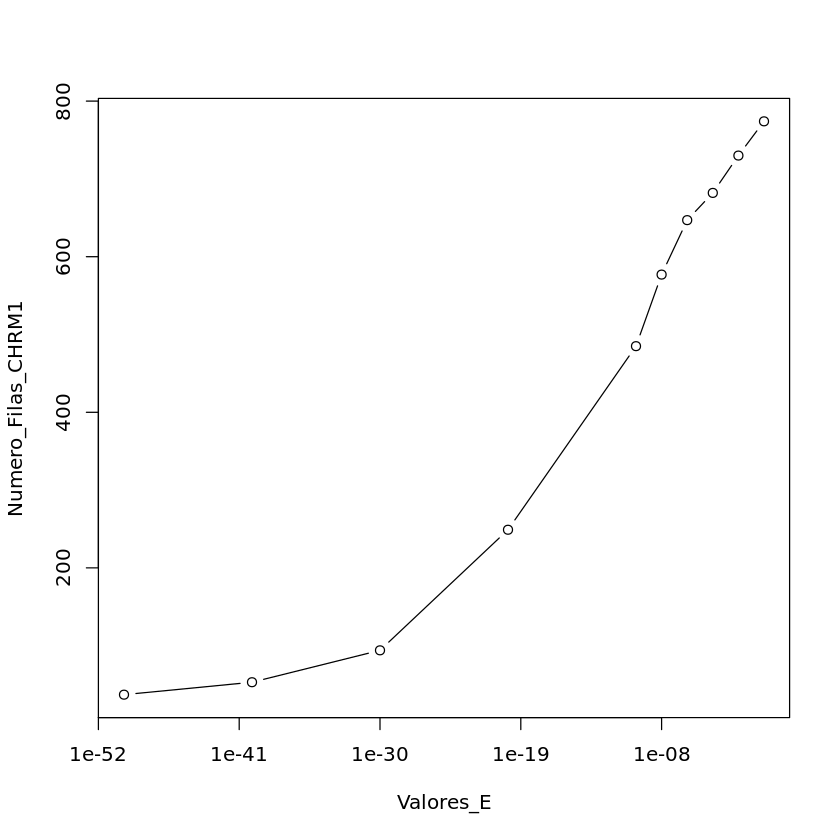

In [9]:
plot(Valores_E, Numero_Filas_CHRM1, log = 'x', type = 'b')

Se comprueba, de nuevo, que a mayor valor E máximo admitido en la búsqueda de homología, mayor es el número de resultados obtenidos. Sin embargo, como se comentaba anteriormente, estos resultados adicionales que se obtienen para valores de E máximos mayores en la búsqueda son menos precisos que aquellos que se obtienen con valores E máximos menores (más restrictivos).


#### Análisis del grado de homología

Es por ello que resulta interesante obervar el grado de homología, es decir, la longitud del alineamiento para estos resultados en los que el valor E es tan alto. Para ello se usa nuevamente la función `plot()` para representar gráficamente la relación entre la longitud del alineamiento y el valor E de los resultados obtenidos en el análisis realizado con el valor E máximo más alto, valor E de 1, el valor menos restrictivo y, por tanto, aquel que permite mayor cantidad de resultados entre las búsquedas que se han realizado. Estos resultados están almacenados en la tabla 10.

En este script a diferencia del anteior se debe especificar el "data frame" de interés dentro de los que presenta la columna, para indicarlo se usa el símbolo del dólar seguido del nombre del "data frame" a extraer, en este caso, se compara la longitud con el valor E, de forma que se indican los "data frame" `Longitud` y `ValorE` para la tabla **10** y los nombres deseados para los ejes que serán `Longitud de alineamiento` y `Valor E`:

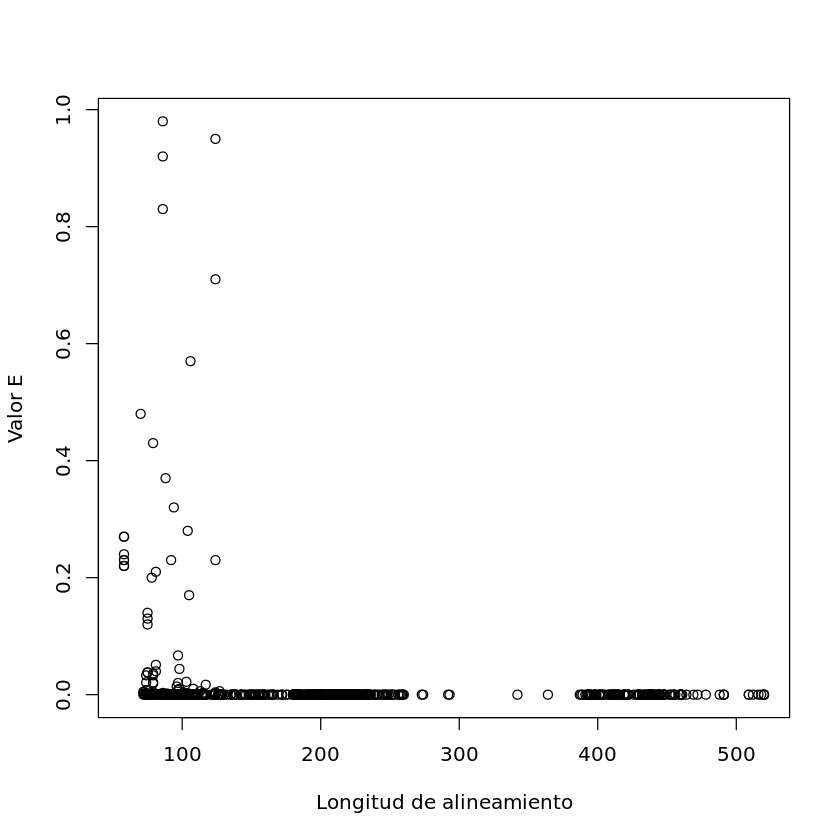

In [10]:
plot(Lista_TablasCHRM1[[10]]$Longitud, Lista_TablasCHRM1[[10]]$ValorE, xlab = 'Longitud de alineamiento', ylab = 'Valor E')

La proteína CHRM1 analizada cuenta con 460 aminoácidos. En los primeros resultados de las tablas en los que el Valor E es mínimo, se observaban alineamientos completos. Sin embargo, tal y como se observa en el gráfico, a medida que el valor E aumenta, la exigencia va siendo menor, con lo que se obtienen alineamientos parciales. De hecho, se observa claramente que para valores E entre 0.0 y 0.2 ya existen varios alineamientos parciales de unos 100 aminoácidos tan solo y conforme aumenta el valor E se encuentran más. También cabe remarcar que los alieamientos que se producen en valores E de 0.0 son tanto parciales como completos, pudiendo observarse dos zonas, una a la izquierda en la que los alineamientos son mayormente parciales (entre 250 aminoácidos y menos de 100 aproximadamente), y otra a la derecha en la que los alineamientos son completos o casi completos (entorno a los 460 aminoácidos).

Esto puede llevar a la conclusión de que aquellos resultados agrupados a la izquierda del gráfico son los correspondientes a alineamientos parciales sobre regiones de dominios de función conservada de la proteína, mientras que aquellos que se muestran a la derecha sobre los 460 aminoácidos, corresponden a alineamientos con la secuencia completa de la proteína, lo que indicaría que esas especies poseen la proteína completa, mientras que las primeras poseen una proteína similar con un dominio de función conservada pero en la que el resto de la proteína es diferente y podría tener una función adicional o modificada respecto a las que muestran homología completa.

Por tanto, resulta interesante analizar qué posiciones de la proteína son las que participan en los alineamientos parciales para encontrar cuál es la secuencia correspondiente al dominio de función conservada. Para ello se realiza una representación gráfica de las posiciones alineadas respecto al valor E, para hacer esta representación previamente se definen los "data frames" que resultan de interés: `InicioQ`, `FinQ` y `ValorE`. Además, otro valor de interés para determinar el valor máximo del eje x es el valor máximo de la última posición alineada de las secuencias, para encontrar este valor se usa la función `max()`:

In [11]:
Inicios <- Lista_TablasCHRM1[[10]]$InicioQ
Finales <- Lista_TablasCHRM1[[10]]$FinQ
ValoresE <- Lista_TablasCHRM1[[10]]$ValorE

MaximoQ <- max(Lista_TablasCHRM1[[10]]$FinQ)

Una vez definidos los objetos, con la función `plot()` se realiza una gráfica vacía `(type='n')` con los rangos de los ejes adecuados. A esta se le añaden posteriormente los segmentos de los datos con la función `segments()` y se definen los nombres de los ejes como `Posición en la secuencia` y `Valor E`:

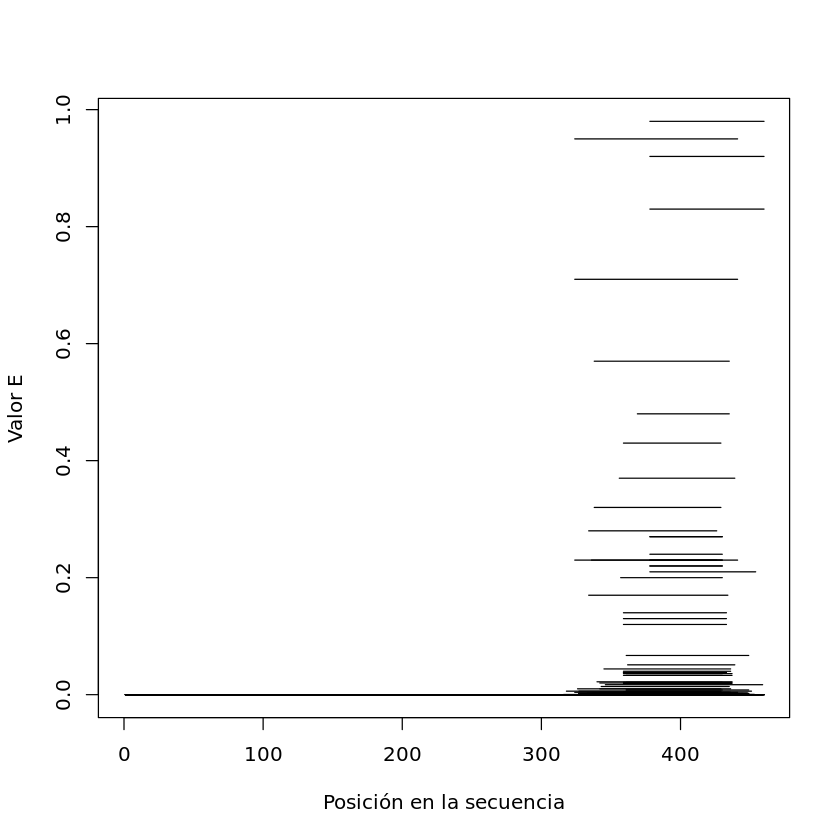

In [12]:
plot(c(0,MaximoQ), range(ValoresE), type='n', xlab='Posición en la secuencia', ylab='Valor E')

segments(Inicios, ValoresE, Finales, ValoresE)

La gráfica obtenida muestra la posición de la homología en las secuencias encontradas con diferentes valores E. Se observa que para valores E de 0.0 la homología es completa (toda la secuencia se alinea), mientras que aquellas secuencias encontradas con un valor E mayor en las que la homología es parcial, las secuencias se alinean generalmente entre los 300 y 460 amioácidos. Por lo que se podría afirmar que la región correspondiente al dominio de función conservada de esta proteína se encontraría entre los 300 y 460 aminoácidos aproximadamente, es decir, sería una secuencia conservada de unos 160 aminoácidos aproximadamente.

En este análisis se ha observado que la proteína de interés `CHRM1` contiene un dominio de función conservada que se encuentra en diferentes especies encontradas con valores E bastante altos, es decir, bastante laxos. Lo que podría dar lugar a observar la presencia de esta región consverada en especies lejanas taxonómicamente entre ellas. Este aspecto de interés se puede analizar realizando una exploración de la distribución taxonómica de las secuencias encontradas.

#### Análisis de la distribución taxonómica

Para realizar este análisis se emplea la función `lapply()` que se aplica al objeto `Lista_TablasCHRM1` en el que se encuentran las tablas en las que se agrupa la información sobre los resultados de la búsqueda de nuestra *query* en la base de datos **Swissprot** para los diferentes valores E máximos que se realizó al inicio. En la columna `NRangS` se indican los nombres de un grupo taxonómico de rango superior al que pertenece cada uno de los resultados, esto es de gran utilidad para poder clasificar y obervar la distribución taxonómica de la proteína. Por tanto, se usa la función `table()` sobre esa columna para que se muestre una agrupación de la cantidad de resultados obtenidos para cada grupo taxonómico en cada tabla:

In [13]:
lapply(Lista_TablasCHRM1, function(x) table(x$NRangS))

[[1]]

              birds         crustaceans even-toed ungulates               flies 
                  3                   1                   5                   1 
      frogs & toads           nematodes            primates             rodents 
                  1                   1                  13                  12 

[[2]]

              birds         bony fishes         crustaceans even-toed ungulates 
                  3                   4                   1                   7 
              flies       frogs & toads               moths           nematodes 
                  1                   1                   1                   1 
           primates             rodents 
                 15                  19 

[[3]]

              birds         bony fishes          carnivores         crustaceans 
                  4                   6                   2                   1 
even-toed ungulates               flies       frogs & toads          gastropods 
    

Así se muestran los diferentes grupos taxonómicos y el número de resultados encontrados con el análisis de **blastp** para cada uno de ellos en cada tabla, de la 1 a la 10.

En los resultados de las tablas 1 y 2 correspondientes a valores E de 1.0e-50 y 1.0e-40, respectivamente, se observan sobre todo especies de vertebrados, en concreto destacan en número las especies de primates y roedores, algunos pájaros y peces óseos también. Raramente se encuentra alguna especie de no vertebrado como nemátodos, moscas o crustáceos. Sin embargo, a partir de valores E de 1.0e-30 hasta 1.0e-20 (tablas 3 y 4), el número de los invertebrados anteriores aumenta y empiezan a obervarse otros como gasterópodos y saltamontes. A partir de valores E por encima de 1.0e-10 llama la atención la aparición de secuencias homólogas procedentes de virus y el pez lanceta (cefalocordado).

Dado que la proteína `CHRM1` es una proteína humana de receptores colinérgicos cabría esperar que solo las proteínas con valores E menores y alineamientos más completos correspondiesen a especies con un sistema nervioso desarrollado como es el caso de los vertebrados. Para observar la relación entre la longitud del alineamiento y la distribución taxonómica de la secuencia de esta proteína se repite el recuento por grupos taxonómicos pero teniendo en cuenta únicamente las secuencias resultado que alineen en al menos 400 aminoácidos. Para ello se definirá un **filtro** que escoja las secuencias con 400 o más aminoácidos alineados, es decir, que en la columna `Longitud` presenten un valor **igual o superior a 400**:

In [14]:
lapply(Lista_TablasCHRM1, function(x) {Filtro <- x$Longitud >= 400
                                      table(x[Filtro, 'NRangS'])
                                      })

[[1]]

              birds         crustaceans even-toed ungulates               flies 
                  3                   1                   5                   0 
      frogs & toads           nematodes            primates             rodents 
                  1                   0                  13                  10 

[[2]]

              birds         bony fishes         crustaceans even-toed ungulates 
                  3                   4                   1                   7 
              flies       frogs & toads               moths           nematodes 
                  0                   1                   1                   0 
           primates             rodents 
                 15                  15 

[[3]]

              birds         bony fishes          carnivores         crustaceans 
                  4                   6                   1                   1 
even-toed ungulates               flies       frogs & toads          gastropods 
    

Tras aplicar el filtro se observa que se ha reducido en gran cantidad el número de invertebrados que se encontraban anteriormente. Para valores E bajos de 1.0e-50  se observan únicamente vertebrados a excepción de una especie de crustáceo. Este podría implicar que los crustáceos también comparten esta proteína con el resto de vertebrados, sin embargo, si se observan los resultados para los crustaceos en valores E superiores, siempre se muestra un único resultado, de forma que este resultado podría ser un caso aislado.
A partir de valores E de 1.0e-40 empiezan a observarse los primeros gasterópodos, polillas y moscas que sí que aumentan su abundancia al aumentar el valor E. Por tanto, no se considerarían casos aislados sino que se podría plantear la posibilidad de que en ellos se conservase gran parte de la secuencia de la proteína de interés.

Estos resultados obtenidos resultan útiles e informativos y son más precisos que los de la primera exploración taxonómica debido a que se les ha aplicado un filtro, aún así, al haber realizado la búsqueda únicamente con **blastp** se podría haber producido un sesgo en los resultados, ya que este análisis solo busca las secuencias homólogas a la *query* proporcionada sin tener en cuenta la región conservada de la proteína que observabamos anteriormente y que es el mayor punto de interés en este análisis puesto que es la que conserva la función.

Una solución a este problema y que permitiría una exploración taxonómica más profunda y precisa sería la búsqueda mediante **psiblast** ya que este método permite realizar búsquedas de homologías más sensibles. Esto es así debido a su modo de actuación por iteraciones: en primer lugar se realiza una búsqueda **blastp** como las realizadas anteriormente, a partir de los resultados de esta que tengan un valor E igual o menor al requerido (indicado) se realiza una matriz de puntuación específica de posición en la que se fijan las posiciones más conservadas de las secuencias encontradas y se les da una puntuación más alta. Así se realizan una serie de iteraciones en las búsqueda donde, en lugar de usarse la *query* original, se emplea la matriz generada en la búsqueda anterior, produciendose así una matriz cada vez más sensible que tiene más en cuenta las regiones conservadas y que permite encontrar homologías en taxones más distantes que también presentan la región conservada de la proteína de interés. Este análisis finaliza cuando no se encuentran nuevas secuencias homólogas, es decir, cuando se encuentra el punto de convergencia.

La opción ideal sería poder plasmar los resultados de la búsqueda en el propio notebook, sin embargo, el resultado de la búsqueda resulta tan extenso que, en caso de hacerlo así, no se llegan a mostrar los resultados de la última iteración que es la que interesa estudiar, ya que es el punto en el que se llega a la convergencia. Es por esto que para realizar la búsqueda de homoloígas con **psiblast** se optará por generar un archivo en formato `html` que permita una visualización completa de los resultados. Para ello se emplea el siguiente script:

In [15]:
system2(command = 'psiblast',
        args = c('-db', 'swissprot',
                 '-query', 'CHRM1.fas',
                 '-out', 'psiCHRM1.html',
                 '-evalue', '1.0e-50',
                 '-inclusion_ethresh', '1.0e-50',
                 '-num_iterations', '0', 
                 '-html'),
       wait = TRUE,
       stdout = TRUE)

character(0)

En el archivo generado con el nombre `psiCHRM1.html` se observan los resultados de esta búsqueda, en estos se indica que se han realizado 6 iteraciones hasta encontrar la convergencia y se muestran todas las especies que presentan una secuencia proteica con homología respecto al dominio de función conservada de la proteína de origen `CHRM1`. Pese a que estos resultados podrían resultar útiles para la discusión de resultados, su reproducibilidad queda en entredicho al no poder plasmar los datos en este documento, sino que dependen de la visualización de un archivo externo, y es por ello que se dejará como una opción alternativa de análisis más profundo y no se considerarán en la discusión de resultados.


### Análisis de las subunidades CHRNA3 y CHRNA7 de un receptor colinérgico nicotínico

Como se comentaba en la introducción, los recepetores colinérgicos se distribuyen en dos tipos: muscarínicos y nicotínicos. El primer análisis se ha realizado con la secuencia de un receptor colinérgico de tipo muscarínico debido a que estos, además de actuar sobre el sistema nervioso central, actuan sobre el periférico, no como en el caso de los receptores colinérgicos de tipo nicotínico que solo actuan en el sistema nervioso central. Es por ello que resulta interesante realizar una rápida exploración taxonómica sobre las secuencias de receptores colinérgicos nicotínicos de las que se dispone para comprobar si esta diferencia en su funcionalidad supone también una diferencia en su distribución taxonómica.

Para realizar este análisis se emplearán los mismos métodos de busqueda mediante **blastp** en la base de datos **Swissprot**, generación de las tablas y exploración de las distribución taxonómica que se han empleado previamente para el análisis de la proteína `CHRM1`.

#### BLASTP en serie

Dado que los Valores E para la búsqueda **blastp** ya fueron definidos previamente, esta vez no se volverán a definir. Se sustituirá la *query* por las proteínas `CHRNA3` y `CHRNA7` y se nombrará como `Lista_TablasCHRNA3` y `Lista_TablasCHRNA7` la salida de los datos en forma de tablas:

In [16]:
Lista_TablasCHRNA3 <- lapply(Valores_E, function(x){ListaBlastCHRNA3 <- system2(
                                                    command = 'blastp',
                                                    args = c('-db', 'swissprot',
                                                            '-query', 'CHRNA3.fas',
                                                            '-evalue', x,
                                                            '-outfmt', '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                                                     stdout = TRUE)
                                                  read.table(textConnection(ListaBlastCHRNA3),
                                                            sep = '\t',
                                                            col.names = c('Nacceso', 'Pident', 'Longitud', 'InicioQ', 'FinQ', 'InicioS', 'FinS', 'ValorE',
                                                                          'IdTaxS', 'NCientS', 'NRangS'))
                                                  })

Lista_TablasCHRNA7 <- lapply(Valores_E, function(x){ListaBlastCHRNA7 <- system2(
                                                    command = 'blastp',
                                                    args = c('-db', 'swissprot',
                                                            '-query', 'CHRNA7.fas',
                                                            '-evalue', x,
                                                            '-outfmt', '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                                                     stdout = TRUE)
                                                  read.table(textConnection(ListaBlastCHRNA7),
                                                            sep = '\t',
                                                            col.names = c('Nacceso', 'Pident', 'Longitud', 'InicioQ', 'FinQ', 'InicioS', 'FinS', 'ValorE',
                                                                          'IdTaxS', 'NCientS', 'NRangS'))
                                                  })

Una vez obtenidos los valores de las búsquedas en forma de tabla se podría realizar un análisis exhaustivo como el realizado para la proteína `CHRM1`, sin embargo, en pos de no realizar una tarea excesivamente extensa y dado que el objetivo es comparar la distribución taxonómica de los receptores colinérgicos muscarínicos con los nicotínicos, se procede directamente a la exploración taxonómica de cada una de estas dos secuencias.

#### Análisis de la distribución taxonómica

Para ello se utiliza de nuevo la función `lapply()` para cada una de las listas de tablas de las dos secuencias y se extrae la cantidad de resultados para cada grupo taxonómico indicado en la columna `NRangS` de dichas tablas mediante la función `table()`. En primer lugar se muestran los resultados para `CHRNA3` y en segundo lugar los resultados para `CHRNA7`:

In [17]:
lapply(Lista_TablasCHRNA3, function(x) table(x$NRangS))

[[1]]

              birds         bony fishes          carnivores even-toed ungulates 
                 14                   7                   1                   9 
              flies       frogs & toads        grasshoppers               moths 
                  4                   6                   1                   1 
          nematodes            primates             rodents     sharks and rays 
                 16                  23                  31                   5 

[[2]]

              birds         bony fishes          carnivores even-toed ungulates 
                 14                   7                   1                   9 
              flies       frogs & toads        grasshoppers               moths 
                  4                   6                   1                   1 
          nematodes            primates             rodents     sharks and rays 
                 19                  24                  33                   5 

[[3]]

     

In [18]:
lapply(Lista_TablasCHRNA7, function(x) table(x$NRangS))

[[1]]

              birds         bony fishes          carnivores even-toed ungulates 
                 14                   7                   1                   9 
              flies       frogs & toads        grasshoppers               moths 
                  4                   6                   1                   1 
          nematodes            primates             rodents     sharks and rays 
                 16                  23                  33                   5 

[[2]]

              birds         bony fishes          carnivores even-toed ungulates 
                 14                   7                   1                   9 
              flies       frogs & toads        grasshoppers               moths 
                  4                   6                   1                   1 
          nematodes            primates             rodents     sharks and rays 
                 18                  24                  33                   5 

[[3]]

     

En ambos casos se observan resultados similares, hecho esperado debido a que son dos subunidades parálogas de un mismo tipo de receptor. En los resultados para valores E de 1.0e-50 se observa una gran cantidad de invertebrados, especialmente nemátodos. Se podrían discutir directamente estos datos, sin embargo, para estas dos secuencias no hemos analizado previamente la longitud de las homologías y estos resultados podrían deberse a que estas especies presentan homolgía parcial.

Por esta razón también se realizará de nuevo las búsqueda con un **filtro**. Para ello se debe tener en cuenta que la longitud de estas secuencias es de 505 aminácidos para `CHRNA3` y de 502 para `CHRNA7`. Por lo que el filtro se aplicará para que solo se muestren los resultados que supongan un alineamiento de **450 aminoácidos como mínimo** en ambos casos. De nuevo, se muestran primeramente los resultados para `CHRNA3` y seguidamente los resultados para `CHRNA7`:

In [19]:
lapply(Lista_TablasCHRNA3, function(x) {Filtro <- x$Longitud >= 450
                                      table(x[Filtro, 'NRangS'])
                                      })

[[1]]

              birds         bony fishes          carnivores even-toed ungulates 
                 13                   6                   0                   9 
              flies       frogs & toads        grasshoppers               moths 
                  3                   6                   1                   1 
          nematodes            primates             rodents     sharks and rays 
                 15                  19                  29                   5 

[[2]]

              birds         bony fishes          carnivores even-toed ungulates 
                 13                   6                   0                   9 
              flies       frogs & toads        grasshoppers               moths 
                  3                   6                   1                   1 
          nematodes            primates             rodents     sharks and rays 
                 17                  19                  31                   5 

[[3]]

     

In [20]:
lapply(Lista_TablasCHRNA7, function(x) {Filtro <- x$Longitud >= 450
                                      table(x[Filtro, 'NRangS'])
                                      })

[[1]]

              birds         bony fishes          carnivores even-toed ungulates 
                 12                   5                   0                   8 
              flies       frogs & toads        grasshoppers               moths 
                  3                   6                   0                   1 
          nematodes            primates             rodents     sharks and rays 
                 15                  18                  30                   5 

[[2]]

              birds         bony fishes          carnivores even-toed ungulates 
                 12                   5                   0                   8 
              flies       frogs & toads        grasshoppers               moths 
                  3                   6                   0                   1 
          nematodes            primates             rodents     sharks and rays 
                 16                  18                  30                   5 

[[3]]

     

Pese al filtro, un gran número de invertebrados aparecen en la búsqueda de homología para ambas secuencias de las subunidades del receptor colinérgico nicotínico. Estos resultados se discutirán junto con el resto en el siguiente apartado.

## Discusión de resultados

Utilizando la secuencia de la proteína `CHRM1` correspondiente un receptor de acetilcolina de tipo muscarínico de humanos como *query* en análisis con **blastp** se han encontrado proteínas homólogas en varias especies, especialmente en mamíferos y otros vertebrados, e incluyendo también algunos invertebrados como moscas y nemátodos. Teniendo en cuenta que esta proteína corresponde a un receptor colinérgico de tipo muscarínico que participa tanto en el sistema nervioso central como en el sistema nervioso periférico, se esperaría encontrar homología únicamente en vertebrados superiores ya que, a diferencia de otros taxones, estos constan de un sistema nervioso bien desarrollado y definido. Sin embargo, en los resultados de los análisis se muestra que la distribución taxonómica de la secuencia de esta proteína llega a otros taxones más lejanos como nemátodos y moscas. Esta distribución más amplia se debe a que la proteína (de 460 aminoácidos) presenta una región de secuencia conservada, de unos 160 aminoácidos aproximadamente, que comparte con otros taxones más alejados evolutivamente. Es decir, la aparición de dichos invertebrados en los resultados de la exploración de la distribución taxonómica de la proteìna `CHRM1` se debe a que estos presentan homología parcial en en la secuencia de función conservada, de modo que estas especies de invertebrados presentan proteínas con funciones similares a la estudiada aunque no sean tan similares a ella como en el caso de los vertebrados. Este hecho se constató al aplicar un filtro en una segunda exploración taxonómica que solo permitió la salida de resultados en los que el alineamiento era de 400 o más aminoácidos. En ese caso los invertebrados desaparecieron en los resultados con un valor E menor, es decir, más exigente, por lo que se confirmó que aquellos invertebrados que aparecían en primer lugar solo mostraban una homología parcial.

Por otro lado, se han realizado exploraciones de la distribución taxonómica de las proteínas `CHRNA3` y `CHRNA7` correspondientes a subunidades parálogas de un receptor de acetilcolina de tipo nicotínico con la finalidad de comparar sus resultados con los obtenidos para `CHRM1` que correspondía al tipo muscarínico. En el caso de estas proteínas (`CHRNA3` y `CHRNA7`) la distribución taxonómica ha sido mucho mayor. Llegando a observarse hasta 20 invertebrados para valores E de 1.0e-50 (el más restrictivo empleado) y pese a haber aplicado filtros restrictivos para la longitud mínima de alineamiento. Teniendo en cuenta estos resultados junto con los datos expuestos en el artículo de Viscardi *et al.* (2021) en el que se sugiere que estos receptores surgieron en un antepasado común entre cordados y cnidarios, se podría llegar a la conclusión de que los receptores colinérgicos de tipo nicotínico se conservaron mejor en taxones más alejados de los cordados quedando más representados en especies de invertebrados a dia de hoy, mientras que los receptores colinérgicos de tipo muscarínico no se conservaron tanto en taxones fuera de los cordados. Esta diferencia puede deberse a la función del dominio de función conservada que se comparte entre taxones, de forma esta resultase más útil para la superviviencia de los invertebrados en el caso de los nicotínicos y no tanto en el caso de los muscarínicos. Aún así, tanto los receptores colinérgicos de tipo muscarínico como de tipo nicotínico están presentes en varios taxones dentro de los cordados lo que da a entender que ambos se conservaron bien en este filo y llegaron, finalmente, a estar muy presentes en los vertebrados.

Por último, resultaría interesante indagar en mayor profundidad en la distribución taxononómica de estas proteínas dentro de ambos taxones, cnidarios y cordados, por separado. Esto permitiría observar en profundidad las especies que presentan homología en cada uno de estos taxones y hacer comparaciones más concretas entre ellos, llevando a discusiones de resultados más profundas. Para ello se requeriría hacer una búsqueda `psiblast` limitada para dichos taxones. Desafortunadamente, esta búsqueda no se puede llevar a cabo en este ambiente de computación debido a sus propias limitaciones. Sin embargo, esta opción sí que está disponible en la web de [BLAST](https://blast.ncbi.nlm.nih.gov/Blast.cgi?PROGRAM=blastp&PAGE_TYPE=BlastSearch&LINK_LOC=blasthome) de NCBI donde se podría llevar a cabo rápidamente. Cabe indicar que el análisis de los resultados de dicha búsqueda fuera de este ambiente de computación no se discuten en esta tarea debido a que ello afectaría a la reproducibilidad de la misma, es por eso que este análisis queda indicado como una propuesta.

## Referencias

* Carlson AB, Kraus GP. Physiology, Cholinergic Receptors. 2020 Sep 6. In: StatPearls [Internet]. Treasure Island (FL): StatPearls Publishing; 2021 Jan–. PMID: [30252390](https://pubmed.ncbi.nlm.nih.gov/30252390/).
* Viscardi, L. H., Imparato, D. O., Bortolini, M. C., & Dalmolin, R. J. S. (2021). Ionotropic Receptors as a Driving Force behind Human Synapse Establishment. Molecular Biology and Evolution, 38(3), 735–744. [https://doi.org/10.1093/molbev/msaa252](https://doi.org/10.1093/molbev/msaa252)
* Stephen F. Altschul, Warren Gish, Webb Miller, Eugene W. Myers and David J. Lipman. Basic local alignment search tool, Journal of Molecular Biology, Volume 215, Issue 3, 1990, Pages 403-410, [doi:10.1016/S0022-2836(05)80360-2](https://doi.org/10.1016/S0022-2836(05)80360-2).